In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import os

import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Set the stylesheets for plots
plt.style.use('ggplot')
plt.style.context('grayscale')

### Step 1: Load CSV files into Pandas dataframes

In [3]:
# Files to load
orders_to_load = os.path.join("..","Resources","orders.csv")
pizza_types_to_load = os.path.join("..","Resources","pizza_types.csv")
pizzas_to_load = os.path.join("..","Resources","pizzas.csv")
order_details_to_load = os.path.join("..","Resources","order_details.csv")

In [4]:
# Read the data into pandas dataframe
orders_df = pd.read_csv(orders_to_load)
pizza_types_df = pd.read_csv(pizza_types_to_load)
pizzas_df = pd.read_csv(pizzas_to_load)
order_details_df = pd.read_csv(order_details_to_load)

### Step 2: Inspect orders data

In [5]:
# dataframe info
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [6]:
# Check for null values
orders_df.isnull().sum()

order_id    0
date        0
time        0
dtype: int64

In [7]:
# Check for duplicate values
orders_df.duplicated().value_counts()

False    21350
dtype: int64

In [8]:
# Datatypes
orders_df.dtypes

order_id     int64
date        object
time        object
dtype: object

#### Add required columns to a new orders dataframe

In [9]:
# Concatenate date and time to a single column
new_orders_df = orders_df.copy()
new_orders_df['date_time'] = new_orders_df['date'] + " " + new_orders_df["time"]
new_orders_df

,order_id,date,time,date_time
0,1,2015-01-01,11:38:36,2015-01-01 11:38:36
1,2,2015-01-01,11:57:40,2015-01-01 11:57:40
2,3,2015-01-01,12:12:28,2015-01-01 12:12:28
3,4,2015-01-01,12:16:31,2015-01-01 12:16:31
4,5,2015-01-01,12:21:30,2015-01-01 12:21:30
...,...,...,...,...
21345,21346,2015-12-31,20:51:07,2015-12-31 20:51:07
21346,21347,2015-12-31,21:14:37,2015-12-31 21:14:37
21347,21348,2015-12-31,21:23:10,2015-12-31 21:23:10
21348,21349,2015-12-31,22:09:54,2015-12-31 22:09:54


In [10]:
# Convert the order time in string format to datetime format
new_orders_df['order_date_time'] = pd.to_datetime(new_orders_df['date_time'])

# Convert the date in string format to datetime format
new_orders_df['order_date'] = pd.to_datetime(new_orders_df['date'])

# Extract hour from datetime
new_orders_df['order_hour'] = new_orders_df['order_date_time'].dt.hour

# Extract day from datetime
new_orders_df['order_day'] = new_orders_df['order_date_time'].dt.day_name()

# Extract name of month from datetime
new_orders_df['order_month'] = new_orders_df['order_date_time'].dt.month_name()
new_orders_df

In [11]:
new_orders_df = new_orders_df.drop(['date','time','date_time'], axis=1)
new_orders_df

,order_id,order_date_time,order_date,order_hour,order_day,order_month
0,1,2015-01-01 11:38:36,2015-01-01,11,Thursday,January
1,2,2015-01-01 11:57:40,2015-01-01,11,Thursday,January
2,3,2015-01-01 12:12:28,2015-01-01,12,Thursday,January
3,4,2015-01-01 12:16:31,2015-01-01,12,Thursday,January
4,5,2015-01-01 12:21:30,2015-01-01,12,Thursday,January
...,...,...,...,...,...,...
21345,21346,2015-12-31 20:51:07,2015-12-31,20,Thursday,December
21346,21347,2015-12-31 21:14:37,2015-12-31,21,Thursday,December
21347,21348,2015-12-31 21:23:10,2015-12-31,21,Thursday,December
21348,21349,2015-12-31 22:09:54,2015-12-31,22,Thursday,December


#### Order Summary

In [12]:
# Get the total number of order days.
len(new_orders_df["order_date"].unique())

358

In [13]:
# Get the total number orders placed in the store.
new_orders_df["order_id"].count()

21350

In [14]:
# The number of orders per day (rounded to nearest integer)
print(f'Typical number of orders per day: {round(new_orders_df["order_id"].count()/len(new_orders_df["order_date"].unique()))}')

The typical number of orders per day: 60


In [17]:
# Peak hours in the store
peak_hours = new_orders_df.groupby(['order_hour']).count()["order_id"]
peak_hours.sort_values(ascending=False).head(5)

order_hour
12    2520
13    2455
18    2399
17    2336
19    2009
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Pizza Orders by Hour')

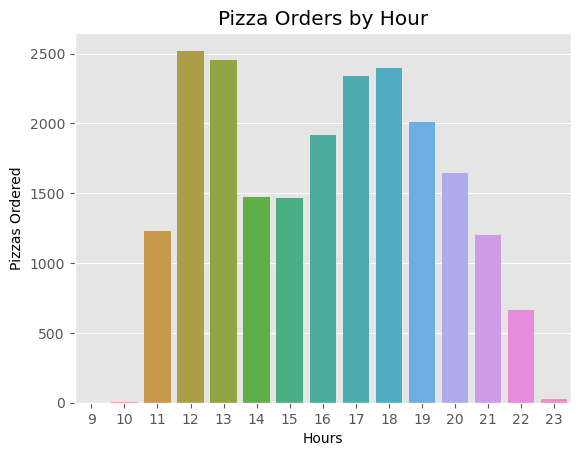

In [24]:
# Plot the peak hours in a day
sns.countplot(data = new_orders_df.sort_values("order_hour",ascending=True), x="order_hour")
plt.xlabel("Hours",fontsize=8,color="black")
plt.ylabel("Orders",fontsize= 8, color="black")
plt.title("Orders by Hour")

- **Noon and evening hours are the peak hours in this pizza store.**

In [25]:
# Busiest day of the week
new_orders_df["order_day"].value_counts().sort_index()

Friday       3538
Monday       2794
Saturday     3158
Sunday       2624
Thursday     3239
Tuesday      2973
Wednesday    3024
Name: order_day, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

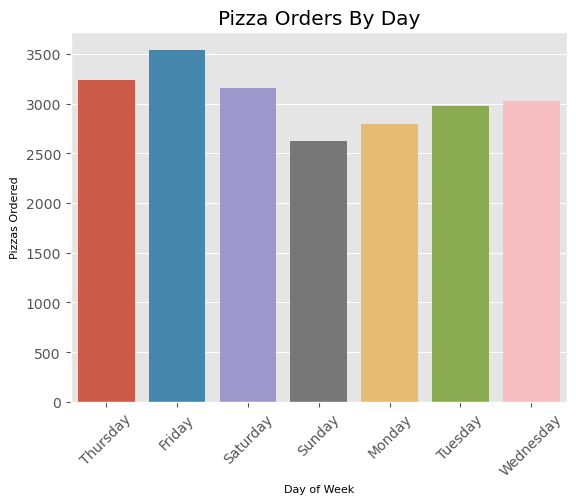

In [27]:
# Plot the busiest days in a week
sns.countplot(data=new_orders_df,x="order_day")
plt.xlabel("Day of Week",fontsize=8,color="black")
plt.ylabel("Orders",fontsize=8,color="black")
plt.title("Orders By Day")
plt.xticks(rotation=45)

- **Friday is the busiest day of the week followed by Thursday.**

In [31]:
# Orders per month
new_orders_df["order_month"].value_counts().sort_values()

October      1646
September    1661
December     1680
February     1685
June         1773
November     1792
April        1799
March        1840
August       1841
January      1845
May          1853
July         1935
Name: order_month, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

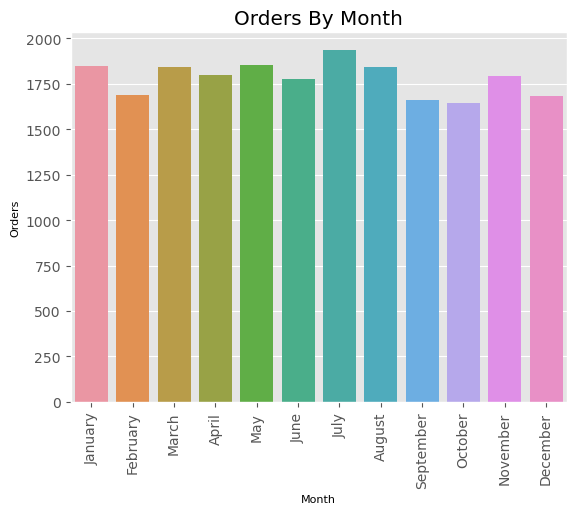

In [29]:
# Plot the busiest months in a year
sns.countplot(data=new_orders_df,x="order_month")
plt.xlabel("Month",fontsize=8,color="black")
plt.ylabel("Orders",fontsize=8,color="black")
plt.title("Orders By Month")
plt.xticks(rotation=90)

- **July and May have the most orders in the year while October and September have least orders.**

### Step 3: Inspect pizza types data

In [19]:
pizza_types_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [20]:
# Check for null values
pizza_types_df.isnull().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [21]:
# Check for duplicate values
pizza_types_df.duplicated().value_counts()

False    32
dtype: int64

In [22]:
pizza_types_df.sample(5)

,pizza_type_id,name,category,ingredients
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
20,soppressata,The Soppressata Pizza,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella..."
27,mediterraneo,The Mediterranean Pizza,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
15,calabrese,The Calabrese Pizza,Supreme,"ëNduja Salami, Pancetta, Tomatoes, Red Onions,..."


#### Pizza Types Summary

In [23]:
# Categories of pizzas available
pizza_types_df['category'].unique()

array(['Chicken', 'Classic', 'Supreme', 'Veggie'], dtype=object)

([<matplotlib.patches.Wedge at 0x7fbb1ea08d10>,
 [Text(0.6978326125800102, 0.8503114986990107, 'Supreme'),
  Text(-0.9701133907831905, 0.5185364105085977, 'Veggie'),
  Text(-0.4209517756015994, -1.0162674857624152, 'Classic'),
  Text(0.9146165735327998, -0.6111272563215624, 'Chicken')],
 [Text(0.38063597049818737, 0.46380627201764213, '28.1%'),
  Text(-0.5291527586090129, 0.28283804209559865, '28.1%'),
  Text(-0.22961005941905419, -0.5543277195067718, '25.0%'),
  Text(0.4988817673815271, -0.3333421398117613, '18.8%')])

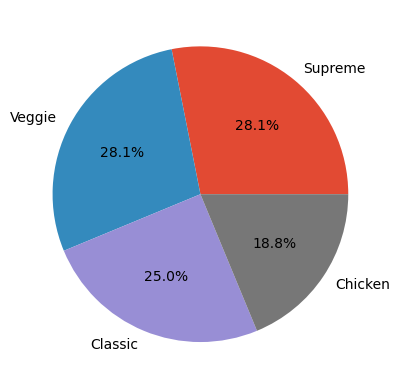

In [32]:
# Pie chart with pizza categories
labels = pizza_types_df["category"].value_counts().index
sizes = pizza_types_df["category"].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%')

- **Veggie and Supreme categories have more pizza types compared to Classic and Chicken.**

### Step 4: Inspect pizzas data

In [34]:
# Dataframe info
pizzas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [35]:
# Check for null values
pizzas_df.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

In [36]:
# Check for duplicate values
pizzas_df.duplicated().value_counts()

False    96
dtype: int64

In [33]:
# Display last few rows of dataframe 
pizzas_df.tail(5)

,pizza_id,pizza_type_id,size,price
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00
95,veggie_veg_l,veggie_veg,L,20.25


#### Pizzas data summary

In [49]:
# Get pizza price statistics
pizzas_df.describe()

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


In [41]:
# The most expensive pizza offered
max_price = pizzas_df['price'].max()
expensive_pizza = pizzas_df['price'] == max_price
pizzas_df[expensive_pizza]

,pizza_id,pizza_type_id,size,price
43,the_greek_xxl,the_greek,XXL,35.95


In [42]:
# Least expensive pizza
least_price = pizzas_df['price'].min()
least_expensive_pizza = pizzas_df['price'] == least_price
pizzas_df[least_expensive_pizza]

,pizza_id,pizza_type_id,size,price
36,pepperoni_s,pepperoni,S,9.75


In [37]:
# Pizza sizes offered
pizzas_df['size'].unique()

array(['S', 'M', 'L', 'XL', 'XXL'], dtype=object)

([<matplotlib.patches.Wedge at 0x7fbb1ea820d0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'S'),
  Text(-1.0994110473472416, 0.03599095679252379, 'M'),
  Text(0.45397770151505074, -1.0019502215814475, 'L'),
  Text(1.0947031927147481, -0.10781892162388282, 'XL'),
  Text(1.0994110440828242, -0.03599105651011783, 'XXL')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5996787530984954, 0.019631430977740245, '32.3%'),
  Text(0.24762420082639128, -0.5465183026807895, '32.3%'),
  Text(0.5971108323898626, -0.05881032088575426, '1.0%'),
  Text(0.599678751317904, -0.019631485369155176, '1.0%')])

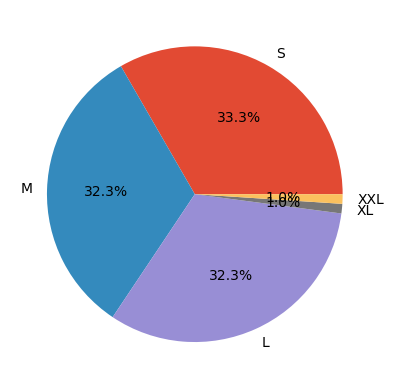

In [38]:
# Pie chart with pizza sizes
labels = pizzas_df["size"].value_counts().index
sizes = pizzas_df["size"].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%')

- **The store offers more Small size pizzas compared to other sizes.**

### Step 5: Inspect order_details data

In [43]:
order_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [44]:
# Check for null values
order_details_df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [45]:
# Check for duplicates
order_details_df.duplicated().value_counts()

False    48620
dtype: int64

In [46]:
order_details_df.sample(5)

,order_details_id,order_id,pizza_id,quantity
26274,26275,11568,sicilian_m,1
16417,16418,7228,pep_msh_pep_s,1
36807,36808,16242,mediterraneo_s,1
42528,42529,18707,calabrese_m,1
10057,10058,4401,thai_ckn_l,1


In [47]:
# Total pizzas sold in the store
order_details_df['quantity'].sum()

49574

### Step 6: Join the data frames

In [48]:
sales_order_df = (new_orders_df
                  .merge(order_details_df, how='inner', on=['order_id'])
                  .merge(pizzas_df, how='inner', on=['pizza_id'])
                  .merge(pizza_types_df, how='inner', on=['pizza_type_id'])
                 )

sales_order_df.head(10)

,order_id,order_date_time,order_date,order_hour,order_day,order_month,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01 11:38:36,2015-01-01,11,Thursday,January,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02 12:22:46,2015-01-02,12,Friday,January,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03 14:22:10,2015-01-03,14,Saturday,January,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03 16:54:54,2015-01-03,16,Saturday,January,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04 20:55:29,2015-01-04,20,Sunday,January,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
5,314,2015-01-06 12:11:58,2015-01-06,12,Tuesday,January,716,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
6,351,2015-01-06 17:37:29,2015-01-06,17,Tuesday,January,806,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
7,377,2015-01-07 12:03:18,2015-01-07,12,Wednesday,January,856,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
8,558,2015-01-09 20:51:10,2015-01-09,20,Friday,January,1263,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,580,2015-01-10 13:56:01,2015-01-10,13,Saturday,January,1312,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


### Step 7: Data Analysis
- How many pizzas are typically in an order? Do we have any bestsellers?
- How much money did we make this year? Can we identify any seasonality in the sales?
- Are there any pizzas we should take of the menu, or any promotions we could leverage?

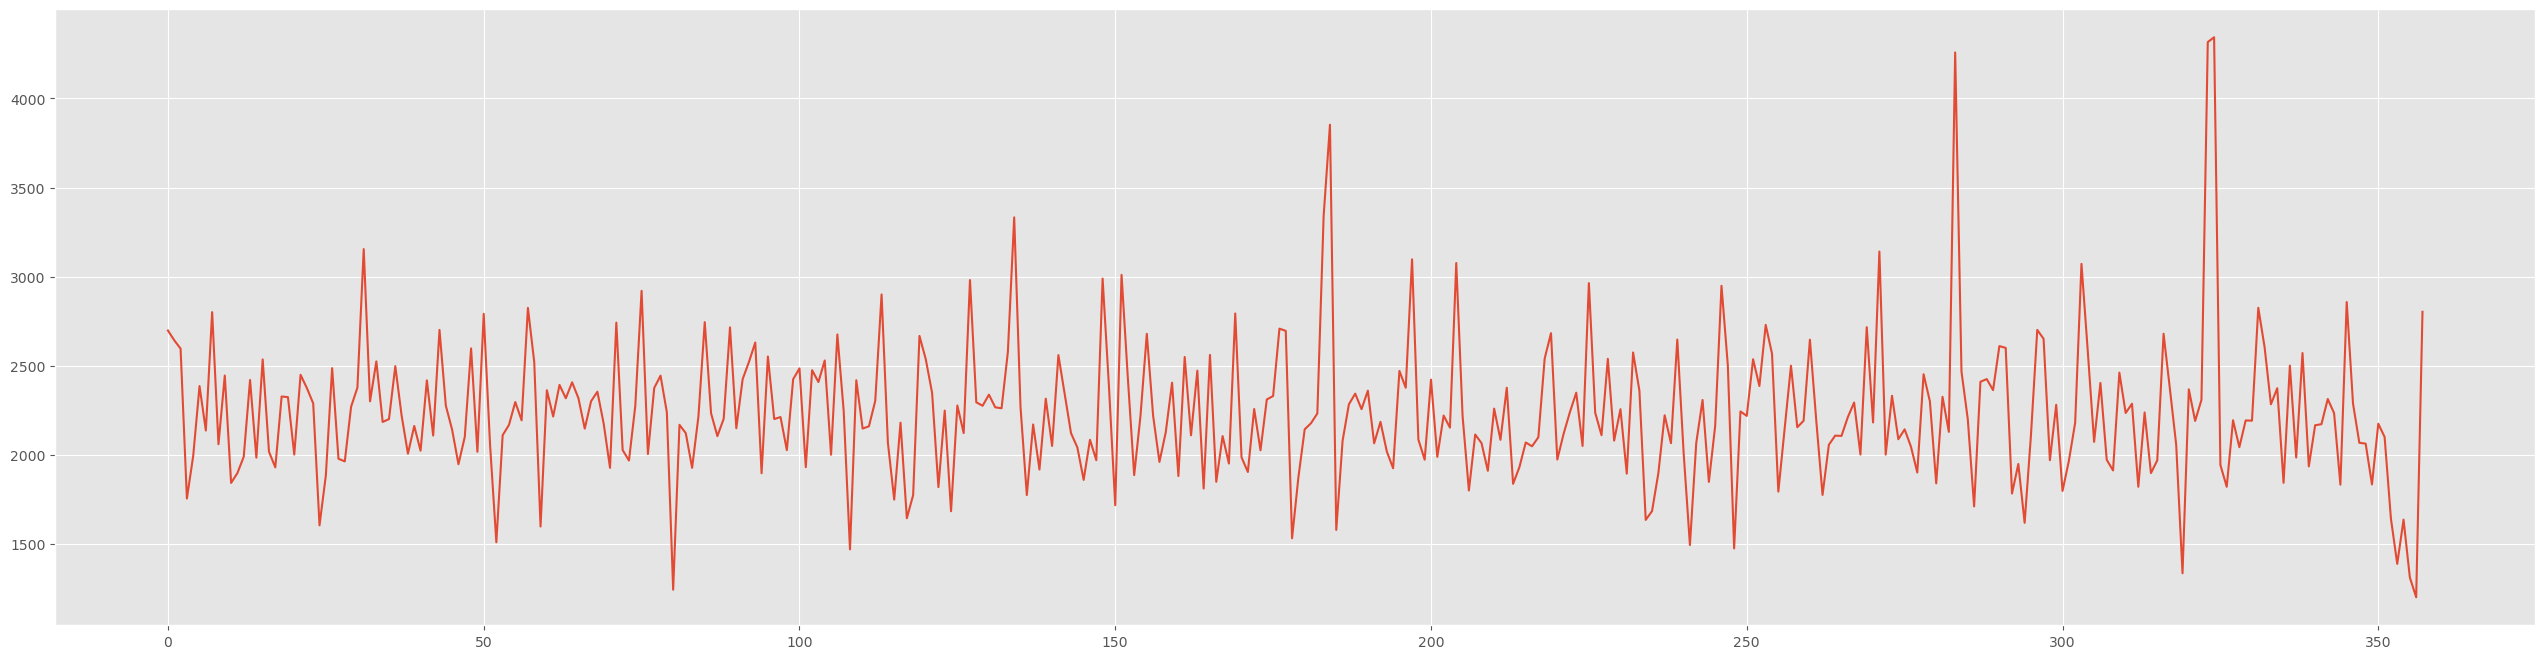

In [51]:
# Plot the sales per date in the year
order_groups_by_day_df = sales_order_df.groupby('order_date')['price'].sum().reset_index()
plt.figure(figsize=(32, 8))
plt.plot(order_groups_by_day_df['price'])
